# Dataset Exploration: ScreenSpot V2 & SROIE

This notebook allows you to visualize examples and their **Ground Truth Labels** from the supported datasets.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datasets import load_dataset
from PIL import Image
import numpy as np
import random

In [2]:
# CONFIGURATION
DATASET_NAME = "sroie" # 'screenspot' or 'sroie'

DATASET_CONFIGS = {
    "screenspot": {
        "id": "HongxinLi/ScreenSpot_v2",
        "split": "test",
        "type": "grounding"
    },
    "sroie": {
        "id": "rajistics/sroie",
        "split": "train",
        "type": "extraction"
    }
}

In [3]:
cfg = DATASET_CONFIGS[DATASET_NAME]
print(f"Loading {cfg['id']}...")
dataset = load_dataset(cfg["id"], split=cfg["split"], trust_remote_code=True)
print(f"Loaded {len(dataset)} examples.")

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'rajistics/sroie' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


Loading rajistics/sroie...
Loaded 626 examples.


In [4]:
def show_example(example, index):
    image = example["image"]
    w, h = image.size
    
    print(f"\n{'='*20} Example {index} {'='*20}")
    
    if cfg["type"] == "grounding":
        instruction = example.get("instruction", "N/A")
        bbox = example.get("bbox", None)
        point = example.get("point", None)
        
        print(f"LABEL - Instruction: {instruction}")
        print(f"LABEL - BBox:        {bbox}")
        print(f"LABEL - Point:       {point}")
        
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        ax = plt.gca()
        if bbox:
            rect = patches.Rectangle((bbox[0]*w, bbox[1]*h), (bbox[2]-bbox[0])*w, (bbox[3]-bbox[1])*h, 
                                   linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        if point:
            plt.plot(point[0]*w, point[1]*h, 'bx', markersize=12)
        plt.title(f"ScreenSpot: {instruction}")
        
    elif cfg["type"] == "extraction":
        text = example.get("text", "N/A")
        print(f"LABEL - Ground Truth Text:\n{text}")
        
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.title("SROIE Receipt Image")
        
    plt.axis('off')
    plt.show()
    print(f"{'='*50}")


==================== Example 572 ====================
LABEL - Ground Truth Text:
<s><s_total>8.95</s_total><s_date>15-06-18</s_date><s_company>MR. D.I.Y. (KUCHAI) SDN BHD</s_company><s_address>LOT 1851-A & 1851-B, JALAN KPB 6, KAWASAN PERINDUSTRIAN BALAKONG, 43300 SERI KEMBANGAN, SELANGOR</s_address></s>


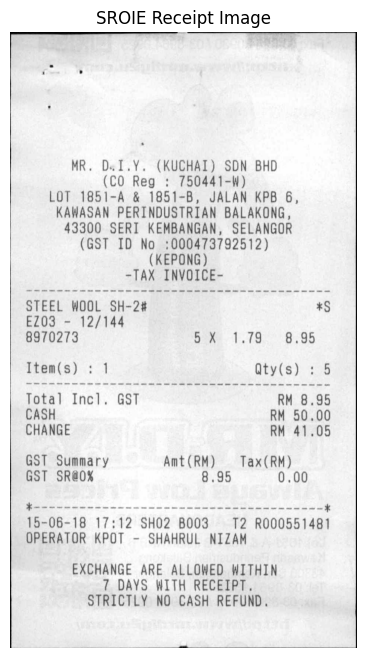


==================== Example 110 ====================
LABEL - Ground Truth Text:
<s><s_total>6.00</s_total><s_date>29/12/2017</s_date><s_company>LIM SENG THO HARDWARE TRADING</s_company><s_address>NO 7, SIMPANG OFF BATU VILLAGE, JALAN IPOH BATU 5, 51200 KUALA LUMPUR MALAYSIA</s_address></s>


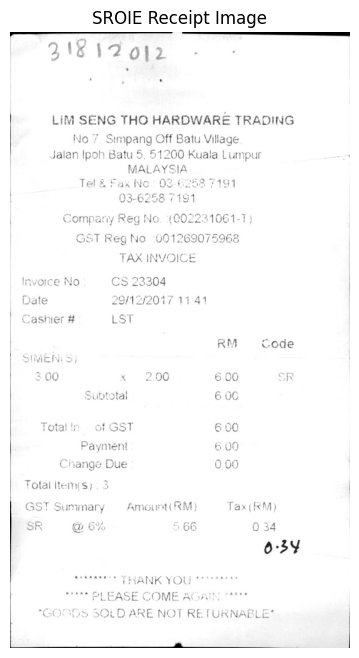


==================== Example 500 ====================
LABEL - Ground Truth Text:
<s><s_total>8.70</s_total><s_date>02/12/2017</s_date><s_company>SANYU STATIONERY SHOP</s_company><s_address>NO. 31G&33G, JALAN SETIA INDAH X ,U13/X 40170 SETIA ALAM</s_address></s>


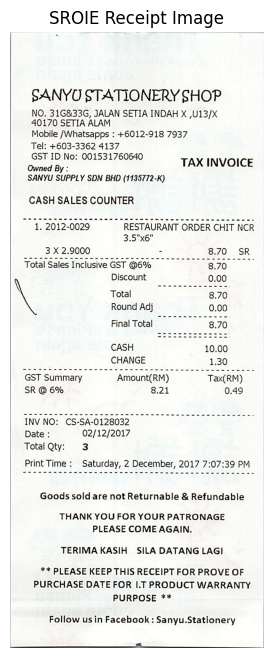

In [5]:
indices = random.sample(range(len(dataset)), 3)
for i in indices:
    show_example(dataset[i], i)